# Project: Brain Tumor Detection

## Libraries


In [3]:
import cv2
import os
import numpy as np
from cv2_plt_imshow import cv2_plt_imshow
import matplotlib.pyplot as plt

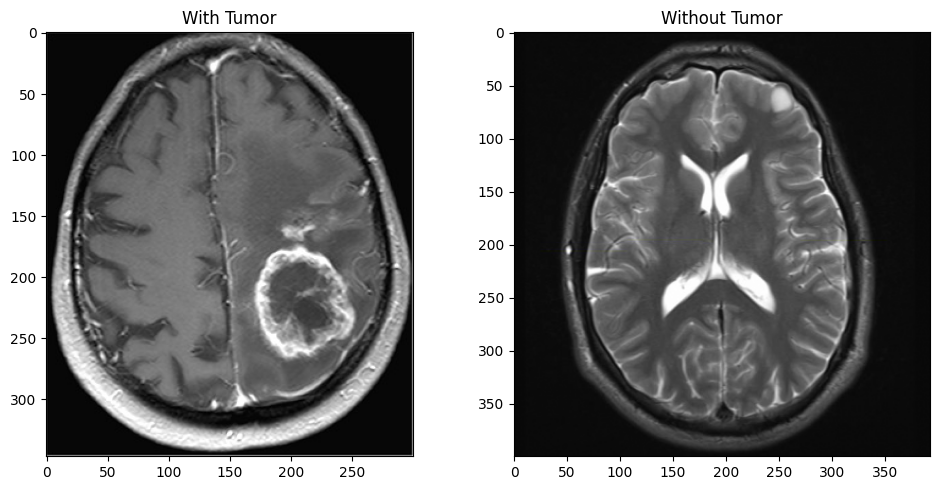

In [4]:
tumor_image = '/content/drive/MyDrive/Brain MRI/brain_tumor_dataset/yes/Y183.jpg'
img1 = cv2.imread(tumor_image)
normal_image = '/content/drive/MyDrive/Brain MRI/brain_tumor_dataset/no/No15.jpg'
img2 = cv2.imread(normal_image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
cv2_plt_imshow(img1)
plt.title('With Tumor')

plt.subplot(1, 2, 2)
cv2_plt_imshow(img2)
plt.title('Without Tumor')
plt.tight_layout()

## Image Preprocessing:
1. **Median filtering:**
2. **Threshold:**

In [5]:
def image_preprocessing(path, folder, label):
    for filename in os.listdir(path):
      if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.gif')):
        image_path = (os.path.join(path, filename))
        original_image = cv2.imread(image_path)
        median_filtered = cv2.medianBlur(original_image, 5)
        thres, thresholded_image = cv2.threshold(median_filtered, 110, 220, cv2.THRESH_BINARY)
        cv2.imwrite(os.path.join(f'/content/drive/MyDrive/{folder}/{label}', f'{filename}.jpg'), thresholded_image)

In [7]:
train_yes_path = '/content/drive/MyDrive/Brain mri preprocessed/yes/Y183.jpg.jpg'
image_preprocessing(train_yes_path, 'Brain mri preprocessed', 'yes')

train_no_path = '/content/drive/MyDrive/Brain MRI/brain_tumor_dataset/no'
image_preprocessing(train_no_path, 'Brain mri preprocessed', 'no')

val_yes_path = '/content/drive/MyDrive/Brain MRI/val/yes'
image_preprocessing(val_yes_path, 'Brain mri val preprocessed', 'yes')

val_no_path = '/content/drive/MyDrive/Brain MRI/val/no'
image_preprocessing(val_no_path, 'Brain mri val preprocessed', 'no')

Image after preprocessing


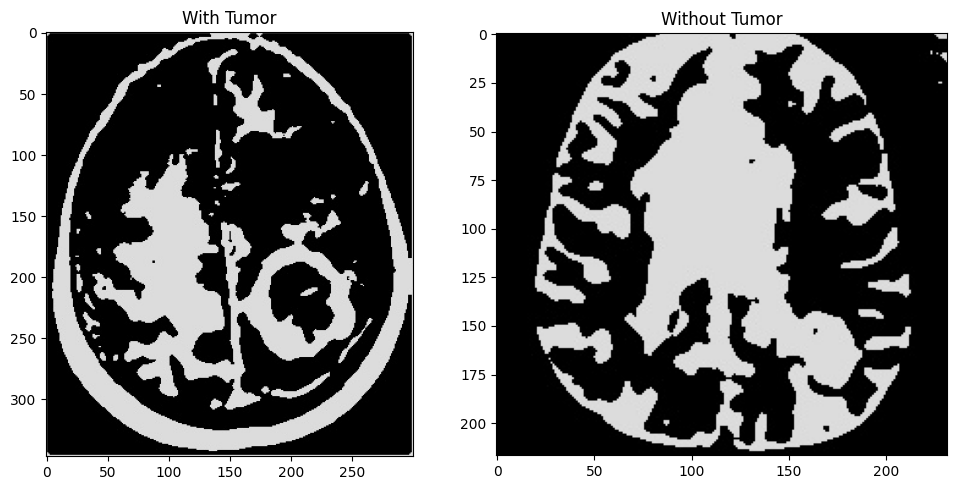

In [12]:
pre_tumor_image = '/content/drive/MyDrive/Brain mri preprocessed/yes/Y183.jpg.jpg'
img1 = cv2.imread(pre_tumor_image)
pre_normal_image = '/content/drive/MyDrive/Brain mri preprocessed/no/15 no.jpg.jpg'
img2 = cv2.imread(pre_normal_image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
cv2_plt_imshow(img1)
plt.title('With Tumor')

plt.subplot(1, 2, 2)
cv2_plt_imshow(img2)
plt.title('Without Tumor')
plt.tight_layout()
print('Image after preprocessing')

## Model Initailizing

In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Image augmentation:

In [14]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Adjust the validation split ratio
)

### Data Splitting:
Splitting the dataset into train and valid(or test)

In [16]:
batch_size = 32
input_shape = (224, 224, 3)
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Brain mri preprocessed',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Brain mri val preprocessed',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 203 images belonging to 2 classes.
Found 29 images belonging to 2 classes.


### Convlutional Neural Network (CNN) Initialization

In [17]:
num_classes = 2

# Create a custom CNN model
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

cnn_model.summary()

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [18]:
# Train the model
history = cnn_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/20
7/7 [==============================] - 18s 705ms/step - loss: 0.9499 - accuracy: 0.4926 - val_loss: 0.6842 - val_accuracy: 0.7241
Epoch 2/20
7/7 [==============================] - 4s 559ms/step - loss: 0.6872 - accuracy: 0.5862 - val_loss: 0.6590 - val_accuracy: 0.5517
Epoch 3/20
7/7 [==============================] - 4s 534ms/step - loss: 0.6871 - accuracy: 0.6108 - val_loss: 0.6470 - val_accuracy: 0.5517
Epoch 4/20
7/7 [==============================] - 5s 719ms/step - loss: 0.6698 - accuracy: 0.6305 - val_loss: 0.6659 - val_accuracy: 0.5517
Epoch 5/20
7/7 [==============================] - 3s 466ms/step - loss: 0.6655 - accuracy: 0.6256 - val_loss: 0.6341 - val_accuracy: 0.5517
Epoch 6/20
7/7 [==============================] - 5s 610ms/step - loss: 0.6490 - accuracy: 0.6207 - val_loss: 0.6320 - val_accuracy: 0.6207
Epoch 7/20
7/7 [==============================] - 5s 724ms/step - loss: 0.6341 - accuracy: 0.6355 - val_loss: 0.6450 - val_accuracy: 0.6207
Epoch 8/20
7/7 [===

### Assesing Model

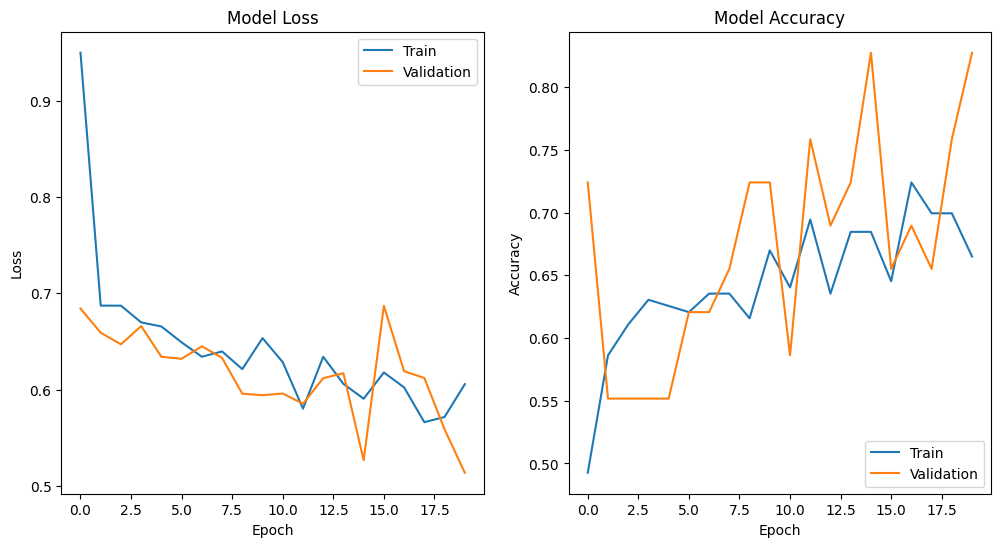

In [19]:
# Plot training & validation loss values
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.show()

In [26]:
cnn_model.save('/content/drive/MyDrive/Brain MRI/CNN_tumor.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 82ms/step
Predicted Class: No
Predicted Probability: 0.7660


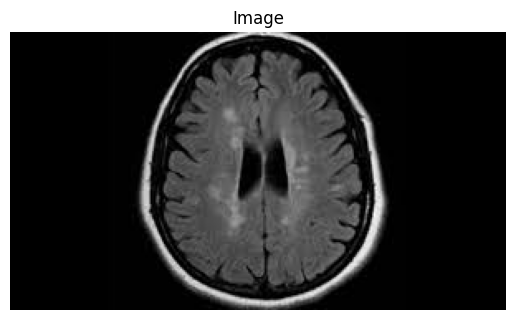

1/1 [==============================] - 0s 22ms/step
Predicted Class: Yes
Predicted Probability: 0.6645


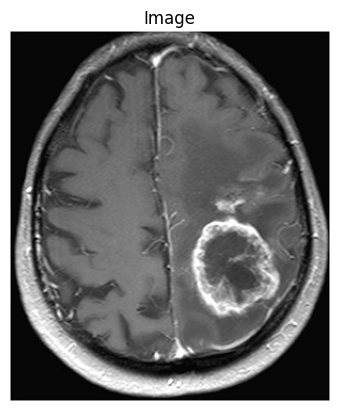

In [29]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model_path = '/content/drive/MyDrive/Brain MRI/CNN_tumor.h5'  # Replace with the path to your trained model
loaded_model = tf.keras.models.load_model(model_path)

def predict_image(image_path, orginal_path):
    # Load an image for prediction
    image = load_img(image_path, target_size=input_shape[:2])
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image /= 255.0  # Rescale to [0, 1]

    # Make predictions
    predictions = loaded_model.predict(image)

    # Calculate accuracy (assuming binary classification)
    class_names = ['No', 'Yes']  # Replace with your class names
    predicted_class = class_names[np.argmax(predictions)]
    predicted_probability = np.max(predictions)

    # Print prediction results
    print(f'Predicted Class: {predicted_class}')
    print(f'Predicted Probability: {predicted_probability:.4f}')

    # Plot the image
    plt.figure()
    plt.imshow(load_img(orginal_path))
    plt.title('Image')
    plt.axis('off')
    plt.show()

# Image paths for prediction
image_path1 = '/content/drive/MyDrive/Brain mri preprocessed/no/13 no.jpg.jpg'
orginal_no =  '/content/drive/MyDrive/Brain MRI/brain_tumor_dataset/no/13 no.jpg'
image_path2 = '/content/drive/MyDrive/Brain mri preprocessed/yes/Y183.jpg.jpg'
orginal_yes = '/content/drive/MyDrive/Brain MRI/brain_tumor_dataset/yes/Y183.jpg'

# Predict the first image
predict_image(image_path1, orginal_no)

# Predict the second image
predict_image(image_path2, orginal_yes)
